In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Levenshtein import distance

In [29]:
truth_path = "./Annotations/val.json"
predict_path = "default_pred.json"
with open(truth_path) as f:
    truth = json.load(f)
    
with open(predict_path) as f:
    predict = json.load(f)

print(len(truth))
print(len(predict))
assert(len(truth) == len(predict))

4319
4319


In [40]:
# load image quality
quality_path = "./quality_annotations/val.json"
with open(quality_path) as f:
    quality = json.load(f)

quality_dict = dict()
for q in quality:
    quality_dict[q['image']] = q['flaws']

In [41]:
def is_number(s):
    if s.isnumeric() or s.isdigit():
        return True
    try:
        float(s)
        return True
    except ValueError:
        return False

In [42]:
colors = ['absolute zero', 'acid green', 'aero', 'aero blue', 'african violet', 'air superiority blue', 'alabaster', 'alice blue', 'alizarin', 'alloy orange', 'almond', 'amaranth', 'amaranth deep purple', 'amaranth pink', 'amaranth purple', 'amaranth red', 'amazon', 'amber', 'Amber ', 'SAE/ECE', 'amethyst', 'android green', 'antique brass', 'antique bronze', 'antique fuchsia', 'antique ruby', 'antique white', 'Ao ', 'English', 'apple green', 'apricot', 'aqua', 'aquamarine', 'arctic lime', 'army green', 'artichoke', 'arylide yellow', 'ash grey', 'asparagus', 'atomic tangerine', 'auburn', 'aureolin', 'avocado', 'azure', 'Azure ', 'X11/web color', 'baby blue', 'baby blue eyes', 'baby pink', 'baby powder', 'baker-miller pink', 'banana mania', 'banana yellow', 'barbie pink', 'barn red', 'battleship grey', 'beau blue', 'beaver', 'beige', "b'dazzled blue", 'big dip o’ruby', 'big foot feet', 'bisque', 'bistre', 'bistre brown', 'bitter lemon', 'bittersweet', 'bittersweet shimmer', 'black', 'black bean', 'black coral', 'black leather jacket', 'black olive', 'black shadows', 'blanched almond', 'blast-off bronze', 'bleu de france', 'blizzard blue', 'blood red', 'blue', 'Blue ', 'Crayola', 'Blue ', 'Munsell', 'Blue ', 'NCS', 'Blue ', 'Pantone', 'Blue ', 'pigment', 'blue bell', 'blue-gray', 'blue-green', 'blue jeans', 'blue sapphire', 'blue-violet', 'blue yonder', 'blueberry', 'blush', 'bole', 'bone', 'booger buster', 'bottle green', 'brick red', 'bright green', 'bright lilac', 'bright maroon', 'bright navy blue', 'bright pink', 'bright turquoise', 'Bright yellow ', 'Crayola', 'brilliant rose', 'brink pink', 'british racing green', 'bronze', 'brown', 'Brown ', 'web', 'brown sugar', 'brunswick green', 'bud green', 'buff', 'burgundy', 'burlywood', 'burnished brown', 'burnt orange', 'burnt sienna', 'burnt umber', 'byzantine', 'byzantium', 'cadet', 'cadet blue', 'cadet grey', 'cadmium green', 'cadmium orange', 'cadmium red', 'cadmium yellow', 'café au lait', 'café noir', 'calypso', 'cambridge blue', 'camel', 'cameo pink', 'canary yellow', 'candy apple red', 'candy pink', 'caput mortuum', 'cardinal', 'caribbean green', 'carmine', 'carnation pink', 'carnelian', 'carolina blue', 'carrot orange', 'castleton green', 'catawba', 'cedar chest', 'celadon', 'celadon green', 'celeste', 'cerise', 'cerulean', 'cerulean blue', 'cerulean frost', 'Cerulean ', 'Crayola', 'champagne', 'champagne pink', 'charcoal', 'charleston green', 'charm pink', 'Chartreuse ', 'traditional', 'Chartreuse ', 'web', 'cherry blossom pink', 'chestnut', 'china pink', 'china rose', 'chinese red', 'chinese violet', 'Chocolate ', 'traditional', 'Chocolate ', 'web', 'cinereous', 'cinnamon satin', 'citrine', 'citron', 'claret', 'cobalt blue', 'cocoa brown', 'coconut', 'coffee', 'columbia blue', 'congo pink', 'cool grey', 'copper', 'copper penny', 'copper red', 'copper rose', 'coquelicot', 'coral', 'coral pink', 'cordovan', 'cornell red', 'Cornflower blue ', 'web', 'Cornflower blue ', 'Crayola', 'cornsilk', 'cosmic cobalt', 'cosmic latte', 'coyote brown', 'cotton candy', 'cream', 'crimson', 'Crimson ', 'UA', 'cultured', 'cyan', 'cyber grape', 'cyber yellow', 'cyclamen', 'dandelion', 'dark blue', 'dark blue-gray', 'dark brown', 'dark byzantium', 'dark cyan', 'dark electric blue', 'dark fuchsia', 'dark goldenrod', 'Dark gray ', 'X11', 'dark green', 'Dark green ', 'X11', 'dark jungle green', 'dark khaki', 'dark lava', 'dark liver', 'dark magenta', 'dark midnight blue', 'dark moss green', 'dark olive green', 'dark orange', 'dark orchid', 'dark pastel green', 'dark purple', 'dark raspberry', 'dark red', 'dark salmon', 'dark sea green', 'dark sienna', 'dark sky blue', 'dark slate blue', 'dark slate gray', 'dark spring green', 'dark tan', 'dark turquoise', 'dark vanilla', 'dark violet', 'dartmouth green', "davy's grey", 'deep cerise', 'deep champagne', 'deep chestnut', 'deep fuchsia', 'deep jungle green', 'deep lemon', 'deep mauve', 'deep pink', 'deep sky blue', 'deep space sparkle', 'deep taupe', 'denim', 'denim blue', 'desert', 'desert sand', 'diamond', 'dim gray', 'dingy dungeon', 'dirt', 'dodger blue', 'dogwood rose', 'duke blue', 'dutch white', 'earth yellow', 'ebony', 'ecru', 'eerie black', 'eggplant', 'eggshell', 'egyptian blue', 'electric blue', 'electric crimson', 'electric indigo', 'electric lime', 'electric purple', 'electric violet', 'emerald', 'eminence', 'english lavender', 'english red', 'english vermillion', 'english violet', 'eton blue', 'eucalyptus', 'fallow', 'falu red', 'fandango', 'fandango pink', 'fashion fuchsia', 'fawn', 'feldgrau', 'fern green', 'field drab', 'fiery rose', 'firebrick', 'fire engine red', 'fire opal', 'flame', 'flax', 'flirt', 'floral white', 'fluorescent blue', 'Forest green ', 'Crayola', 'Forest green ', 'traditional', 'Forest green ', 'web', 'french beige', 'french bistre', 'french blue', 'french fuchsia', 'french lilac', 'french lime', 'french mauve', 'french pink', 'french raspberry', 'french rose', 'french sky blue', 'french violet', 'frostbite', 'fuchsia', 'Fuchsia ', 'Crayola', 'fuchsia purple', 'fuchsia rose', 'fulvous', 'fuzzy wuzzy', 'gainsboro', 'gamboge', 'garnet', 'generic viridian', 'ghost white', 'glaucous', 'glossy grape', 'go green', 'gold', 'Gold ', 'metallic', 'Gold (web) ', 'Golden', 'Gold ', 'Crayola', 'gold fusion', 'golden brown', 'golden poppy', 'golden yellow', 'goldenrod', 'granite gray', 'granny smith apple', 'Gray ', 'web', 'Gray ', 'X11', 'green', 'Green ', 'Crayola', 'Green ', 'HTML/CSS color', 'Green ', 'Munsell', 'Green ', 'NCS', 'Green ', 'Pantone', 'Green ', 'pigment', 'Green ', 'RYB', 'green-blue', 'Green-blue ', 'Crayola', 'green-cyan', 'green lizard', 'green sheen', 'green-yellow', 'Green-yellow ', 'Crayola', 'grullo', 'gunmetal', 'han blue', 'han purple', 'hansa yellow', 'harlequin', 'harvest gold', 'heat wave', 'heliotrope', 'heliotrope gray', 'hollywood cerise', 'honeydew', 'honolulu blue', "hooker's green", 'hot fuchsia', 'hot magenta', 'hot pink', 'hunter green', 'iceberg', 'icterine', 'illuminating emerald', 'imperial red', 'inchworm', 'independence', 'india green', 'indian red', 'indian yellow', 'indigo', 'indigo dye', 'International orange ', 'aerospace', 'International orange ', 'engineering', 'International orange ', 'Golden Gate Bridge', 'iris', 'irresistible', 'isabelline', 'italian sky blue', 'ivory', 'jade', 'japanese carmine', 'japanese violet', 'jasmine', 'jazzberry jam', 'jet', 'jonquil', 'june bud', 'jungle green', 'kelly green', 'keppel', 'key lime', 'Khaki (web) ', 'Khaki', 'Khaki (X11) ', 'Light khaki', 'kobe', 'kobi', 'kobicha', 'kombu green', 'ksu purple', 'la salle green', 'languid lavender', 'lanzones', 'lapis lazuli', 'laser lemon', 'laurel green', 'lava', 'Lavender ', 'floral', 'Lavender ', 'web', 'lavender blue', 'lavender blush', 'lavender gray', 'lavender indigo', 'lavender magenta', 'lavender mist', 'lavender pink', 'lavender purple', 'lavender rose', 'lawn green', 'lemon', 'lemon chiffon', 'lemon curry', 'lemon glacier', 'lemon iced tea', 'lemon lime', 'lemon lime', 'lemon meringue', 'lemon yellow', 'Lemon yellow ', 'Crayola', 'lenurple', 'liberty', 'licorice', 'light apricot', 'light blue', 'light brown', 'light carmine pink', 'light chocolate cosmos', 'light cobalt blue', 'light coral', 'light cornflower blue', 'light crimson', 'light cyan', 'light deep pink', 'light french beige', 'light fuchsia pink', 'light gold', 'light goldenrod', 'light goldenrod yellow', 'light gray', 'light grayish magenta', 'light green', 'light hot pink', 'light khaki', 'light medium orchid', 'light moss green', 'light mustard', 'light orange', 'light orchid', 'light pastel purple', 'light periwinkle', 'light pink', 'light red', 'light red ochre', 'light salmon', 'light salmon pink', 'light sea green', 'light silver', 'light sky blue', 'light slate gray', 'light steel blue', 'light taupe', 'light thulian pink', 'light turquoise', 'light violet', 'light yellow', 'lilac', 'lilac luster', 'Lime ', 'color wheel', 'Lime (web) ', 'X11 green', 'lime green', 'limerick', 'lincoln green', 'linen', 'lion', 'liseran purple', 'little boy blue', 'little girl pink', 'liver', 'Liver ', 'dogs', 'Liver ', 'organ', 'liver chestnut', 'livid', 'lotion', 'lotion blue', 'lotion pink', 'lumber', 'lust', 'maastricht blue', 'macaroni and cheese', 'madder lake', 'magenta', 'Magenta ', 'Pantone', 'mahogany', 'maize', 'Maize ', 'Crayola', 'majorelle blue', 'malachite', 'manatee', 'mandarin', 'mango', 'mango green', 'mango tango', 'mantis', 'mardi gras', 'marigold', 'Maroon ', 'Crayola', 'Maroon ', 'HTML/CSS', 'Maroon ', 'X11', 'mauve', 'mauve taupe', 'mauvelous', 'maximum blue', 'maximum blue green', 'maximum blue purple', 'maximum green', 'maximum green yellow', 'maximum orange', 'maximum purple', 'maximum pink', 'maximum red', 'maximum red purple', 'maximum violet', 'maximum yellow', 'maximum yellow red', 'may green', 'maya blue', 'meat brown', 'medium aquamarine', 'medium blue', 'medium candy apple red', 'medium carmine', 'medium champagne', 'medium electric blue', 'medium green', 'medium jungle green', 'medium lavender magenta', 'medium orange', 'medium orchid', 'medium persian blue', 'medium pink', 'medium purple', 'medium red', 'medium red-violet', 'medium ruby', 'medium sea green', 'medium sky blue', 'medium slate blue', 'medium spring bud', 'medium spring green', 'medium taupe', 'medium turquoise', 'medium tuscan red', 'medium vermilion', 'medium violet', 'medium violet-red', 'medium yellow', 'mellow apricot', 'mellow yellow', 'melon', 'Melon ', 'Crayola', 'menthol', 'metallic blue', 'metallic bronze', 'metallic brown', 'metallic gold', 'metallic green', 'metallic orange', 'metallic pink', 'metallic red', 'metallic seaweed', 'metallic silver', 'metallic sunburst', 'metallic violet', 'metallic yellow', 'mexican pink', 'microsoft blue', 'microsoft edge blue', 'microsoft green', 'microsoft red', 'microsoft yellow', 'middle blue', 'middle blue green', 'middle blue purple', 'middle grey', 'middle green', 'middle green yellow', 'middle purple', 'middle red', 'middle red purple', 'middle yellow', 'middle yellow red', 'midnight', 'midnight blue', 'midnight blue', 'Midnight green ', 'eagle green', 'mikado yellow', 'milk', 'milk chocolate', 'mimi pink', 'mindaro', 'ming', 'minion yellow', 'mint', 'mint cream', 'mint green', 'misty moss', 'misty rose', 'moccasin', 'mocha', 'mode beige', 'moonstone', 'moonstone blue', 'mordant red 19', 'morning blue', 'moss green', 'mountain meadow', 'mountbatten pink', 'msu green', 'mud', 'mughal green', 'mulberry', 'Mulberry ', 'Crayola', "mummy's tomb", 'mustard', 'mustard brown', 'mustard green', 'mustard yellow', 'myrtle green', 'mystic', 'mystic maroon', 'mystic red', 'nadeshiko pink', 'napier green', 'naples yellow', 'navajo white', 'navy blue', 'Navy blue ', 'Crayola', 'navy purple', 'neon blue', 'neon brown', 'neon carrot', 'neon cyan', 'neon fuchsia', 'neon gold', 'neon gray', 'neon dark green', 'neon green', 'neon green', 'neon pink', 'neon purple', 'neon red', 'neon scarlet', 'neon silver', 'neon tangerine', 'neon yellow', 'new car', 'new york pink', 'nickel', 'nintendo red', 'non-photo blue', 'nyanza', 'ocean blue', 'ocean boat blue', 'ocean green', 'ochre', 'office green', 'ogre odor', 'old burgundy', 'old gold', 'old heliotrope', 'old lace', 'old lavender', 'old mauve', 'old moss green', 'old rose', 'old silver', 'olive', 'Olive drab ', '#3', 'olive drab #7', 'olive green', 'olivine', 'onyx', 'opal', 'opera mauve', 'orange', 'Orange ', 'color wheel', 'Orange ', 'Crayola', 'Orange ', 'Pantone', 'Orange ', 'RYB', 'Orange ', 'web', 'orange iced tea', 'orange peel', 'orange-red', 'Orange-red ', 'Crayola', 'orange soda', 'orange soda', 'orange-yellow', 'Orange-yellow ', 'Crayola', 'orchid', 'orchid pink', 'Orchid ', 'Crayola', 'orioles orange', 'otter brown', 'outer space', 'Outer space ', 'Crayola', 'outrageous orange', 'oxblood', 'oxford blue', 'oxley', 'ou crimson red', 'pacific blue', 'pakistan green', 'palatinate blue', 'palatinate purple', 'pale aqua', 'pale blue', 'pale brown', 'pale carmine', 'pale cerulean', 'pale chestnut', 'pale copper', 'pale cornflower blue', 'pale cyan', 'pale gold', 'pale goldenrod', 'pale green', 'pale lavender', 'pale magenta', 'pale magenta-pink', 'pale pink', 'pale plum', 'pale red-violet', 'pale robin egg blue', 'pale silver', 'pale spring bud', 'pale taupe', 'pale turquoise', 'pale violet', 'pale violet-red', 'palm leaf', 'pansy purple', 'paolo veronese green', 'papaya whip', 'paradise pink', 'parchment', 'paris green', 'parrot pink', 'pastel blue', 'pastel brown', 'pastel gray', 'pastel green', 'pastel magenta', 'pastel orange', 'pastel pink', 'pastel purple', 'pastel red', 'pastel violet', 'pastel yellow', 'patriarch', "payne's grey", 'peach', 'Peach ', 'Crayola', 'peach-orange', 'peach puff', 'peach-yellow', 'pear', 'pearl', 'pearl aqua', 'pearly purple', 'peridot', 'periwinkle', 'Periwinkle ', 'Crayola', 'permanent geranium lake', 'persian blue', 'persian green', 'persian indigo', 'persian orange', 'persian pink', 'persian plum', 'persian red', 'persian rose', 'persimmon', 'peru', 'petal', 'pewter blue', 'philippine blue', 'philippine bronze', 'philippine brown', 'philippine gold', 'philippine golden yellow', 'philippine gray', 'philippine green', 'philippine indigo', 'philippine orange', 'philippine pink', 'philippine red', 'philippine silver', 'philippine sky blue', 'philippine violet', 'philippine yellow', 'phlox', 'phthalo blue', 'phthalo green', 'picton blue', 'pictorial carmine', 'piggy pink', 'pine green', 'pine tree', 'pineapple', 'pink', 'Pink ', 'Pantone', 'Pink Diamond ', 'Ace Hardware Color', 'Pink Diamond ', 'Independent Retailers Colors', 'pink flamingo', 'pink lace', 'pink lavender', 'pink-orange', 'pink pearl', 'pink raspberry', 'pink sherbet', 'pistachio', 'pixie powder', 'platinum', 'plum', 'Plum ', 'web', 'plump purple', 'poison purple', 'police blue', 'polished pine', 'pomp and power', 'popstar', 'portland orange', 'powder blue', 'prilly blue', 'prilly pink', 'prilly red', 'princess perfume', 'princeton orange', 'prune', 'prussian blue', 'psychedelic purple', 'puce', 'puce red', 'Pullman Brown ', 'UPS Brown', 'pullman green', 'pumpkin', 'Purple ', 'HTML', 'Purple ', 'Munsell', 'Purple ', 'X11', 'purple heart', 'purple mountain majesty', 'purple navy', 'purple pizzazz', 'purple plum', 'purple taupe', 'purpureus', 'quartz', 'queen blue', 'queen pink', 'quick silver', 'quinacridone magenta', 'quincy', 'rackley', 'radical red', 'raisin black', 'rajah', 'raspberry', 'raspberry glace', 'raspberry pink', 'raspberry rose', 'raw sienna', 'raw umber', 'razzle dazzle rose', 'razzmatazz', 'razzmic berry', 'rebecca purple', 'red', 'Red ', 'Crayola', 'Red ', 'Munsell', 'Red ', 'NCS', 'Red ', 'Pantone', 'Red ', 'pigment', 'Red ', 'RYB', 'red-brown', 'red cola', 'red devil', 'red-orange', 'Red-orange ', 'Crayola', 'Red-orange ', 'Color wheel', 'red-purple', 'red rum', 'red salsa', 'red strawberry', 'red-violet', 'Red-violet ', 'Crayola', 'Red-violet ', 'Color wheel', 'redwood', 'registration black', 'resolution blue', 'rhythm', 'rich brilliant lavender', 'rich carmine', 'rich electric blue', 'rich lavender', 'rich lilac', 'rich maroon', 'rifle green', 'ripe mango', 'roast coffee', 'robin egg blue', 'rocket metallic', 'roman silver', 'root beer', 'rose', 'rose bonbon', 'rose dust', 'rose ebony', 'rose garnet', 'rose gold', 'rose madder', 'rose pink', 'rose quartz', 'rose quartz pink', 'rose red', 'rose taupe', 'rose vale', 'rosewood', 'rosy brown', 'royal azure', 'royal blue', 'royal blue', 'royal brown', 'royal fuchsia', 'royal green', 'royal orange', 'royal pink', 'royal red', 'royal red', 'royal purple', 'royal yellow', 'ruber', 'rubine red', 'ruby', 'ruby red', 'rufous', 'rum', 'russet', 'russian green', 'russian violet', 'rust', 'rusty red', 'sacramento state green', 'saddle brown', 'safety orange', 'Safety orange ', 'blaze orange', 'safety yellow', 'saffron', 'sage', "st. patrick's blue", 'salem', 'salmon', 'salmon rose', 'salmon pink', 'samsung blue', 'sand', 'sand dune', 'sandstorm', 'sandy brown', 'sandy tan', 'sandy taupe', 'sap green', 'sapphire', 'sapphire blue', 'sasquatch socks', 'satin sheen gold', 'scarlet', 'Scarlet ', 'Crayola', 'schauss pink', 'school bus yellow', "screamin' green", 'sea blue', 'sea foam green', 'sea green', 'Sea green ', 'Crayola', 'sea serpent', 'seal brown', 'seashell', 'selective yellow', 'sepia', 'shadow', 'shadow blue', 'shampoo', 'shamrock green', 'shandy', 'sheen green', 'shimmering blush', 'shiny shamrock', 'shocking pink', 'Shocking pink ', 'Crayola', 'sienna', 'silver', 'Silver ', 'Crayola', 'Silver ', 'Metallic', 'silver chalice', 'silver foil', 'silver lake blue', 'silver pink', 'silver sand', 'sinopia', 'sizzling red', 'sizzling sunrise', 'skobeloff', 'sky blue', 'Sky blue ', 'Crayola', 'sky magenta', 'slate blue', 'slate gray', 'slimy green', 'Smalt ', 'Dark powder blue', 'smashed pumpkin', 'smitten', 'smoke', 'smokey topaz', 'smoky black', 'snow', 'soap', 'solid pink', 'sonic silver', 'spartan crimson', 'space cadet', 'spanish bistre', 'spanish blue', 'spanish carmine', 'spanish crimson', 'spanish gray', 'spanish green', 'spanish orange', 'spanish pink', 'spanish purple', 'spanish red', 'spanish sky blue', 'spanish violet', 'spanish viridian', 'spanish yellow', 'spicy mix', 'spiro disco ball', 'spring bud', 'spring frost', 'spring green', 'Spring green ', 'Crayola', 'star command blue', 'steel blue', 'steel pink', 'steel teal', 'stil de grain yellow', 'straw', 'strawberry', 'stop red', 'strawberry iced tea', 'strawberry red', 'sugar plum', 'sunburnt cyclops', 'sunglow', 'sunny', 'sunray', 'sunset', 'sunset orange', 'super pink', 'sweet brown', 'taffy', 'tan', 'Tan ', 'Crayola', 'tangelo', 'tangerine', 'tangerine yellow', 'tango pink', 'tart orange', 'taupe', 'taupe gray', 'tea green', 'tea rose', 'tea rose', 'teal', 'teal blue', 'teal deer', 'teal green', 'telemagenta', 'temptress', 'Tenné ', 'tawny', 'terra cotta', 'thistle', 'Thistle ', 'Crayola', 'thulian pink', 'tickle me pink', 'tiffany blue', "tiger's eye", 'timberwolf', 'titanium', 'titanium yellow', 'tomato', 'tomato sauce', 'toolbox', 'tooth', 'topaz', 'tractor red', 'trolley grey', 'tropical rain forest', 'tropical violet', 'true blue', 'tufts blue', 'tulip', 'tumbleweed', 'turkish rose', 'turquoise', 'turquoise blue', 'turquoise green', 'turquoise surf', 'turtle green', 'tuscan', 'tuscan brown', 'tuscan red', 'tuscan tan', 'tuscany', 'twilight lavender', 'twitter blue', 'tyrian purple', 'ube', 'ultramarine', 'ultramarine blue', 'Ultramarine blue ', "Caran d'Ache", 'ultra pink', 'ultra red', 'umber', 'unbleached silk', 'united nations blue', 'unmellow yellow', 'up maroon', 'upsdell red', 'urobilin', 'vampire black', 'van dyke brown', 'vanilla', 'vanilla ice', 'vegas gold', 'venetian red', 'verdigris', 'vermilion', 'vermilion', 'veronica', 'verse green', 'very light azure', 'very light blue', 'very light malachite green', 'very light tangelo', 'very pale orange', 'very pale yellow', 'vine green', 'violet', 'Violet ', "Caran d'Ache", 'Violet ', 'color wheel', 'Violet ', 'crayola', 'Violet ', 'RYB', 'Violet ', 'web', 'violet-blue', 'Violet-blue ', 'Crayola', 'violet-red', 'violin brown', 'viridian', 'viridian green', 'vista blue', 'vivid amber', 'vivid auburn', 'vivid burgundy', 'vivid cerise', 'vivid cerulean', 'vivid crimson', 'vivid gamboge', 'vivid lime green', 'vivid malachite', 'vivid mulberry', 'vivid orange', 'vivid orange peel', 'vivid orchid', 'vivid raspberry', 'vivid red', 'vivid red-tangelo', 'vivid sky blue', 'vivid tangelo', 'vivid tangerine', 'vivid vermilion', 'vivid violet', 'vivid yellow', 'water', 'watermelon', 'watermelon red', 'watermelon yellow', 'waterspout', 'weldon blue', 'wenge', 'wheat', 'white', 'white chocolate', 'white coffee', 'white smoke', 'wild orchid', 'wild strawberry', 'wild watermelon', 'willpower orange', 'windsor tan', 'wine', 'wine dregs', 'wine red', 'winter sky', 'winter wizard', 'wintergreen dream', 'wisteria', 'wood brown', 'xanadu', 'yellow', 'Yellow ', 'Crayola', 'Yellow ', 'Munsell', 'Yellow ', 'NCS', 'Yellow ', 'Pantone', 'Yellow ', 'process', 'Yellow ', 'RYB', 'yellow-green', 'Yellow-green ', 'Crayola', 'yellow orange', 'Yellow Orange ', 'Color Wheel', 'yellow rose', 'yellow sunshine', 'yinmn blue', 'zaffre', 'zebra white', 'zinnwaldite', 'zomp']

In [43]:
def flaw_acc(flaw_type, human_count):
    acc = 0
    count = 0
    answerable_acc = 0
    answerable_count = 0
    total_acc = 0
    total_count = 0
    dist = 0
    answerable_dist = 0
    
    binary_acc = 0
    binary_count = 0
    binary_dist = 0
    
    num_acc = 0
    num_count = 0
    num_dist = 0
    
    color_acc = 0
    color_count = 0
    color_dist = 0
    j = 0
    for i in range(len(truth)):
        # image id should be same
        if truth[i]["image"] != predict[j]["image"]:
            print("skip")
            continue
        predict_label = predict[j]["answer"]
        num_human = 0.0
        cur_dist = 0
        
        # calculate acc for each question
        for a in truth[i]["answers"]:
            cur_dist += distance(predict_label, a["answer"])
            if a["answer"] == predict_label:
                num_human += 1.0
        cur_acc = min(num_human/3, 1)
        
        # calculate correct answers (>=3 human label)
        answer_dict = {}
        for a in truth[i]["answers"]:
            if a["answer"] in answer_dict:
                answer_dict[a["answer"]] += 1
            else:
                answer_dict[a["answer"]] = 1
        
        correct_answers = []
        for label,score in answer_dict.items():
            if score >= 3:
                correct_answers.append(label)
        
        is_num = False
        for c in correct_answers:
            if is_number(c):
                is_num = True
        
        is_color = False
        for c in correct_answers:
            if c in colors:
                is_color = True

        # calculate flaw acc
        flaw = quality_dict[predict[j]["image"]]
        if flaw[flaw_type] >= human_count:
            dist += (cur_dist/10)
            count += 1
            acc += cur_acc
            if "unanswerable" in correct_answers:
                answerable_count += 1
                answerable_acc += cur_acc
                answerable_dist += (cur_dist/10)
            if 'yes' in correct_answers or 'no' in correct_answers:
                binary_count += 1
                binary_acc += cur_acc
                binary_dist += (cur_dist/10)
            
            if is_num:
                num_count += 1
                num_acc += cur_acc
                num_dist += (cur_dist/10)  
                
            if is_color:
                color_count += 1
                color_acc += cur_acc
                color_dist += (cur_dist/10)  
                
        j+=1
    
#     print(flaw_type + " percent", count/len(truth))
    
    print(flaw_type + " binary acc", binary_acc/binary_count)
    print(flaw_type + " num acc", num_acc/num_count)
    print(flaw_type + " unanswerable acc", answerable_acc/answerable_count)
    print(flaw_type + " color acc", color_acc/color_count)
    print(flaw_type + " acc", acc/count)
    
#     print(flaw_type + " binary dist", binary_dist/binary_count)
#     print(flaw_type + " num dist", num_dist/num_count)
#     print(flaw_type + " unanswerable dist", answerable_dist/answerable_count)
#     print(flaw_type + " dist", dist/count)
    

In [44]:
acc = 0
count = 0
answerable_acc = 0
answerable_count = 0
total_acc = 0
total_count = 0
dist = 0
answerable_dist = 0

binary_acc = 0
binary_count = 0
binary_dist = 0

num_acc = 0
num_count = 0
num_dist = 0

color_acc = 0
color_count = 0
color_dist = 0
j = 0
for i in range(len(truth)):
    # image id should be same
    if truth[i]["image"] != predict[j]["image"]:
        print("skip")
        continue
    predict_label = predict[j]["answer"]
    num_human = 0.0
    cur_dist = 0

    # calculate acc for each question
    for a in truth[i]["answers"]:
        cur_dist += distance(predict_label, a["answer"])
        if a["answer"] == predict_label:
            num_human += 1.0
    cur_acc = min(num_human/3, 1)

    # calculate correct answers (>=3 human label)
    answer_dict = {}
    for a in truth[i]["answers"]:
        if a["answer"] in answer_dict:
            answer_dict[a["answer"]] += 1
        else:
            answer_dict[a["answer"]] = 1

    correct_answers = []
    for label,score in answer_dict.items():
        if score >= 3:
            correct_answers.append(label)

    is_num = False
    for c in correct_answers:
        if is_number(c):
            is_num = True
            
    is_color = False
    for c in correct_answers:
        if c in colors:
            is_color = True

    dist += (cur_dist/10)
    count += 1
    acc += cur_acc
    if "unanswerable" in correct_answers:
        answerable_count += 1
        answerable_acc += cur_acc
        answerable_dist += (cur_dist/10)
    if "yes" in correct_answers or "no" in correct_answers:
        binary_count += 1
        binary_acc += cur_acc
        binary_dist += (cur_dist/10)

    if is_num:
        num_count += 1
        num_acc += cur_acc
        num_dist += (cur_dist/10)  
    
    if is_color:
        color_count += 1
        color_acc += cur_acc
        color_dist += (cur_dist/10)  
    
    j+=1

print("percent", count/len(truth))

print("binary acc", binary_acc/binary_count)
print("num acc", num_acc/num_count)
print("unanswerable acc", answerable_acc/answerable_count)
print("color acc", color_acc/color_count)
print("acc", acc/count)

print("binary dist", binary_dist/binary_count)
print("num dist", num_dist/num_count)
print("unanswerable dist", answerable_dist/answerable_count)
print("dist", dist/count)

percent 1.0
binary acc 0.6642335766423361
num acc 0.3004694835680751
unanswerable acc 0.8301659125188539
color acc 0.601025641025641
acc 0.4896966890483908
binary dist 6.667883211678835
num dist 8.071830985915492
unanswerable dist 6.126787330316738
dist 8.729636489928225


In [45]:
total_acc = 0
answerable_acc = 0
answerable_count = 0

dist = 0
answerable_dist = 0

j = 0
for i in range(len(truth)):
    # image id should be same
    if truth[i]["image"] != predict[j]["image"]:
        print("skip")
        continue
    answers = []
    predict_label = predict[j]["answer"]
    num_human = 0.0
    cur_dist = 0
    for a in truth[i]["answers"]:
        cur_dist += distance(predict_label, a["answer"])
        if a["answer"] == predict_label:
            num_human += 1.0
    dist += cur_dist/10
    acc = min(num_human/3, 1)
    if truth[i]['answer_type'] != "unanswerable":
        answerable_count += 1
        answerable_acc += acc
        answerable_dist += cur_dist/10
    
    total_acc += acc
    j+=1

print("total acc", total_acc/len(truth))
print("total answerable acc", answerable_acc/answerable_count)
print("avg edit distance", dist/(len(truth)))
print("anserable edit distance", answerable_dist/answerable_count)

total acc 0.4896966890483908
total answerable acc 0.37286980231765493
avg edit distance 8.729636489928225
anserable edit distance 10.109475119291075


In [46]:
# flaw acc
ALL_FLAW_TYPE = ["BLR", "FRM", "DRK", "BRT", "OBS", "OTH", "NON", "ROT"]

for f in ALL_FLAW_TYPE:
    print("")
    flaw_acc(f, 1)


BLR binary acc 0.6851851851851851
BLR num acc 0.3095238095238095
BLR unanswerable acc 0.8220720720720721
BLR color acc 0.6174863387978141
BLR acc 0.5146329365079356

FRM binary acc 0.6741741741741744
FRM num acc 0.327683615819209
FRM unanswerable acc 0.8248528902734512
FRM color acc 0.6306306306306307
FRM acc 0.5067172897196256

DRK binary acc 0.7017543859649124
DRK num acc 0.46153846153846156
DRK unanswerable acc 0.804741980474198
DRK color acc 0.619047619047619
DRK acc 0.5448868071818892

BRT binary acc 0.7298850574712645
BRT num acc 0.3
BRT unanswerable acc 0.8676470588235293
BRT color acc 0.613095238095238
BRT acc 0.5302843016069224

OBS binary acc 0.6016260162601625
OBS num acc 0.2222222222222222
OBS unanswerable acc 0.8250460405156538
OBS color acc 0.7200000000000003
OBS acc 0.5718341851220892

OTH binary acc 0.5238095238095238
OTH num acc 0.5
OTH unanswerable acc 0.8144927536231884
OTH color acc 0.8431372549019607
OTH acc 0.6299603174603172

NON binary acc 0.6543859649122807
NO

In [43]:
flaw_acc("NON", 5)

NON percent 0.06783977772632553
NON acc 0.37428896473265083
NON answerable acc 0.3345724907063198
NON dist 9.454607508532424
NON answerable dist 9.87100371747212


In [47]:
def flaw_percent(flaw_type, human_count):
    count = 0
    answerable_count = 0
    binary_count = 0
    num_count = 0
    color_count = 0
    for i in range(len(truth)):
        # image id should be same
        assert(truth[i]["image"] == predict[i]["image"])
        
        # calculate correct answers (>=3 human label)
        answer_dict = {}
        for a in truth[i]["answers"]:
            if a["answer"] in answer_dict:
                answer_dict[a["answer"]] += 1
            else:
                answer_dict[a["answer"]] = 1
        
        correct_answers = []
        for label,score in answer_dict.items():
            if score >= 3:
                correct_answers.append(label)
        
        is_num = False
        for c in correct_answers:
            if is_number(c):
                is_num = True
        
        is_color = False
        for c in correct_answers:
            if c in colors:
                is_color = True

        # calculate flaw acc
        flaw = quality_dict[predict[i]["image"]]
        if flaw[flaw_type] >= human_count:
            count += 1
            if "unanswerable" in correct_answers:
                answerable_count += 1
            if "yes" in correct_answers or "no" in correct_answers:
                binary_count += 1
            
            if is_num:
                num_count += 1
            if is_color:
                color_count += 1
    return binary_count/count, num_count/count, answerable_count/count, color_count/count
    
ALL_FLAW_TYPE = ["BLR", "FRM", "DRK", "BRT", "OBS", "ROT", "NON"]
binary_arr = []
num_arr = []
unanswer_arr = []
color_arr = []
for f in ALL_FLAW_TYPE:
    binary, num, unanswer, color = flaw_percent(f, 1)
    binary_arr.append(binary)
    num_arr.append(num)
    unanswer_arr.append(unanswer)
    color_arr.append(color)

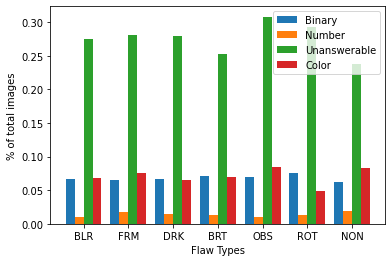

In [49]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = np.arange(7)
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.3, binary_arr, width)
plt.bar(x-0.1, num_arr, width)
plt.bar(x+0.1, unanswer_arr, width)
plt.bar(x+0.3, color_arr, width)
plt.xticks(x, ALL_FLAW_TYPE)
plt.xlabel("Flaw Types")
plt.ylabel("% of total images")
plt.legend(["Binary", "Number", "Unanswerable", "Color"])
plt.show()